<a href="https://colab.research.google.com/github/AngelTroncoso/TelecomX_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Telecom X - Análisis de Evasión de Clientes**

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

#📌 Extracción

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
df['Churn'].apply(type).value_counts()


,count
Churn,
<class 'str'>,7267


In [4]:
df['Churn'].unique()


array(['No', 'Yes', ''], dtype=object)

In [5]:
df = df[df['Churn'].str.strip() != '']


In [6]:
print(df['Churn'].unique())
# Salida esperada: ['No', 'Yes']


['No' 'Yes']


In [7]:
df['Churn'].dtype
# Salida esperada: dtype('O')


dtype('O')

#🔧 Transformación

In [8]:
df = pd.json_normalize(df.to_dict(orient='records'))
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [9]:
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


#📊 Carga y análisis

1. **Ver Datos Generales:**

In [10]:
rename_dict = {
    'customerID': 'ID_cliente',
    'Churn': 'Cancelado',
    'customer.gender': 'Género',
    'customer.SeniorCitizen': 'Adulto_mayor',
    'customer.Partner': 'Tiene_pareja',
    'customer.Dependents': 'Tiene_dependientes',
    'customer.tenure': 'Antigüedad_meses',

    'phone.PhoneService': 'Servicio_telefonía',
    'phone.MultipleLines': 'Líneas_múltiples',

    'internet.InternetService': 'Servicio_internet',
    'internet.OnlineSecurity': 'Seguridad_en_línea',
    'internet.OnlineBackup': 'Respaldo_en_línea',
    'internet.DeviceProtection': 'Protección_dispositivos',
    'internet.TechSupport': 'Soporte_técnico',
    'internet.StreamingTV': 'TV_en_streaming',
    'internet.StreamingMovies': 'Películas_en_streaming',

    'account.Contract': 'Tipo_contrato',
    'account.PaperlessBilling': 'Factura_sin_papel',
    'account.PaymentMethod': 'Método_pago',
    'account.Charges.Monthly': 'Cargo_mensual',
    'account.Charges.Total': 'Cargo_total'
}


In [11]:
df = df.rename(columns=rename_dict)


In [12]:
df.shape

(7043, 21)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_cliente               7043 non-null   object 
 1   Cancelado                7043 non-null   object 
 2   Género                   7043 non-null   object 
 3   Adulto_mayor             7043 non-null   int64  
 4   Tiene_pareja             7043 non-null   object 
 5   Tiene_dependientes       7043 non-null   object 
 6   Antigüedad_meses         7043 non-null   int64  
 7   Servicio_telefonía       7043 non-null   object 
 8   Líneas_múltiples         7043 non-null   object 
 9   Servicio_internet        7043 non-null   object 
 10  Seguridad_en_línea       7043 non-null   object 
 11  Respaldo_en_línea        7043 non-null   object 
 12  Protección_dispositivos  7043 non-null   object 
 13  Soporte_técnico          7043 non-null   object 
 14  TV_en_streaming         

In [14]:
df['Cancelado'].unique()

array(['No', 'Yes'], dtype=object)

2.**Valores Nulos:**

In [15]:
df.isnull().sum()

,0
ID_cliente,0
Cancelado,0
Género,0
Adulto_mayor,0
Tiene_pareja,0
Tiene_dependientes,0
Antigüedad_meses,0
Servicio_telefonía,0
Líneas_múltiples,0
Servicio_internet,0


3.**Tipos de datos por grupos:**

In [16]:
df.dtypes

,0
ID_cliente,object
Cancelado,object
Género,object
Adulto_mayor,int64
Tiene_pareja,object
Tiene_dependientes,object
Antigüedad_meses,int64
Servicio_telefonía,object
Líneas_múltiples,object
Servicio_internet,object


In [17]:
df['Cargo_total'] = df['Cargo_total'].str.replace(',', '.', regex=False)

In [18]:
df['Cargo_total'] = pd.to_numeric(df['Cargo_total'], errors='coerce')

In [19]:
df.head()

,ID_cliente,Cancelado,Género,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Antigüedad_meses,Servicio_telefonía,Líneas_múltiples,Servicio_internet,...,Respaldo_en_línea,Protección_dispositivos,Soporte_técnico,TV_en_streaming,Películas_en_streaming,Tipo_contrato,Factura_sin_papel,Método_pago,Cargo_mensual,Cargo_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [20]:
df.dtypes

,0
ID_cliente,object
Cancelado,object
Género,object
Adulto_mayor,int64
Tiene_pareja,object
Tiene_dependientes,object
Antigüedad_meses,int64
Servicio_telefonía,object
Líneas_múltiples,object
Servicio_internet,object


In [21]:
for col in df.columns:
    print(f"\n📌 Columna: {col}")
    print(df[col].unique())



📌 Columna: ID_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

📌 Columna: Cancelado
['No' 'Yes']

📌 Columna: Género
['Female' 'Male']

📌 Columna: Adulto_mayor
[0 1]

📌 Columna: Tiene_pareja
['Yes' 'No']

📌 Columna: Tiene_dependientes
['Yes' 'No']

📌 Columna: Antigüedad_meses
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]

📌 Columna: Servicio_telefonía
['Yes' 'No']

📌 Columna: Líneas_múltiples
['No' 'Yes' 'No phone service']

📌 Columna: Servicio_internet
['DSL' 'Fiber optic' 'No']

📌 Columna: Seguridad_en_línea
['No' 'Yes' 'No internet service']

📌 Columna: Respaldo_en_línea
['Yes' 'No' 'No internet service']

📌 Columna: Protección_dispositivos
['No' 'Yes' 'No internet service']

📌 Columna: Soporte_técnico
['Yes' 'No' 'No internet service']

📌 Columna: TV_en_streaming

In [22]:
df['Cancelado'].value_counts(dropna=False)


,count
Cancelado,
No,5174
Yes,1869


**Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.**

 📊Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.  

📌 ¿Por qué esto es útil?
Puedes ver si los clientes que cancelaron (Cancelado == 'Yes') tienen gastos diarios más altos o más bajos.

📌Es útil para segmentación, predicción de cancelación y clasificación de tipos de clientes.

In [23]:
#Asumimos 30 días promedio por mes:
df['Cuentas_Diarias'] = df['Cargo_mensual'] / 30


In [24]:
#validación rápida
print(df[['Cargo_mensual', 'Cuentas_Diarias']].head())


   Cargo_mensual  Cuentas_Diarias
0           65.6         2.186667
1           59.9         1.996667
2           73.9         2.463333
3           98.0         3.266667
4           83.9         2.796667


In [25]:
#Resumen estadístico
df['Cuentas_Diarias'].describe()


,Cuentas_Diarias
count,7043.000000
mean,2.158723
std,1.003002
min,0.608333
25%,1.183333
50%,2.345000
75%,2.995000
max,3.958333


In [26]:
df.head()

,ID_cliente,Cancelado,Género,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Antigüedad_meses,Servicio_telefonía,Líneas_múltiples,Servicio_internet,...,Protección_dispositivos,Soporte_técnico,TV_en_streaming,Películas_en_streaming,Tipo_contrato,Factura_sin_papel,Método_pago,Cargo_mensual,Cargo_total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


**2.Transformar datos para Machine Learning**

In [27]:
#separar datos tipos object y darle una variable de asignacion para extración con cikitlearn
obj_cols = df.select_dtypes(include='object').columns
print("Columnas tipo object:\n", obj_cols)


Columnas tipo object:
 Index(['ID_cliente', 'Cancelado', 'Género', 'Tiene_pareja',
       'Tiene_dependientes', 'Servicio_telefonía', 'Líneas_múltiples',
       'Servicio_internet', 'Seguridad_en_línea', 'Respaldo_en_línea',
       'Protección_dispositivos', 'Soporte_técnico', 'TV_en_streaming',
       'Películas_en_streaming', 'Tipo_contrato', 'Factura_sin_papel',
       'Método_pago'],
      dtype='object')


In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in obj_cols:
    try:
        df[col] = le.fit_transform(df[col])
    except:
        print(f"No se pudo transformar: {col}")


In [29]:
df.nunique()


,0
ID_cliente,7043
Cancelado,2
Género,2
Adulto_mayor,2
Tiene_pareja,2
Tiene_dependientes,2
Antigüedad_meses,73
Servicio_telefonía,2
Líneas_múltiples,3
Servicio_internet,3


In [30]:
df.head()

,ID_cliente,Cancelado,Género,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Antigüedad_meses,Servicio_telefonía,Líneas_múltiples,Servicio_internet,...,Protección_dispositivos,Soporte_técnico,TV_en_streaming,Películas_en_streaming,Tipo_contrato,Factura_sin_papel,Método_pago,Cargo_mensual,Cargo_total,Cuentas_Diarias
0,0,0,0,0,1,1,9,1,0,0,...,0,2,2,0,1,1,3,65.6,593.30,2.186667
1,1,0,1,0,0,0,9,1,2,0,...,0,0,0,2,0,0,3,59.9,542.40,1.996667
2,2,1,1,0,0,0,4,1,0,1,...,2,0,0,0,0,1,2,73.9,280.85,2.463333
3,3,1,1,1,1,0,13,1,0,1,...,2,0,2,2,0,1,2,98.0,1237.85,3.266667
4,4,1,0,1,1,0,3,1,0,1,...,0,2,2,0,0,1,3,83.9,267.40,2.796667


In [31]:
df.describe()

,ID_cliente,Cancelado,Género,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Antigüedad_meses,Servicio_telefonía,Líneas_múltiples,Servicio_internet,...,Protección_dispositivos,Soporte_técnico,TV_en_streaming,Películas_en_streaming,Tipo_contrato,Factura_sin_papel,Método_pago,Cargo_mensual,Cargo_total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,3521.000000,0.265370,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,2.158723
std,2033.283305,0.441561,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,401.450000,1.183333
50%,3521.000000,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,2.345000
75%,5281.500000,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3794.737500,2.995000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,3.958333


**📉 Entender la distribución de Churn (evasión de clientes) es fundamental para todo análisis de comportamiento o predicción.**

In [32]:
df.dtypes

,0
ID_cliente,int64
Cancelado,int64
Género,int64
Adulto_mayor,int64
Tiene_pareja,int64
Tiene_dependientes,int64
Antigüedad_meses,int64
Servicio_telefonía,int64
Líneas_múltiples,int64
Servicio_internet,int64


##Recuento de evasión por variables categóricas


=== Análisis de evasión según Género ===
Recuento absoluto:
 Cancelado    0     1
Género              
Femenino   939  2549
Masculino  930  2625

Proporciones:
 Cancelado         0         1
Género                       
Femenino   0.269209  0.730791
Masculino  0.261603  0.738397


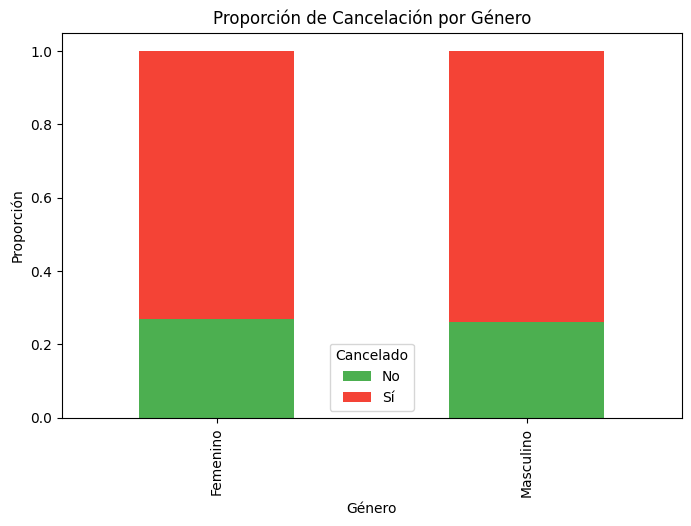

p-valor Chi-cuadrado para Género: 0.4866

=== Análisis de evasión según Adulto_mayor ===
Recuento absoluto:
 Cancelado        0     1
Adulto_mayor            
No            1393  4508
Sí             476   666

Proporciones:
 Cancelado            0         1
Adulto_mayor                    
No            0.236062  0.763938
Sí            0.416813  0.583187


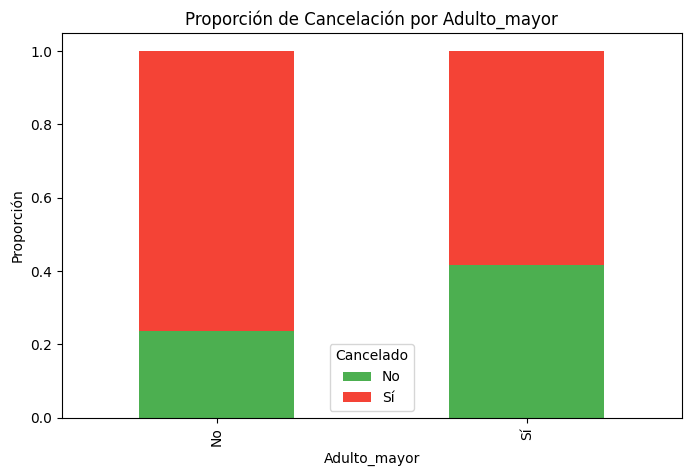

p-valor Chi-cuadrado para Adulto_mayor: 0.0000

=== Análisis de evasión según Tiene_pareja ===
Recuento absoluto:
 Cancelado        0     1
Tiene_pareja            
No            1200  2441
Sí             669  2733

Proporciones:
 Cancelado            0         1
Tiene_pareja                    
No            0.329580  0.670420
Sí            0.196649  0.803351


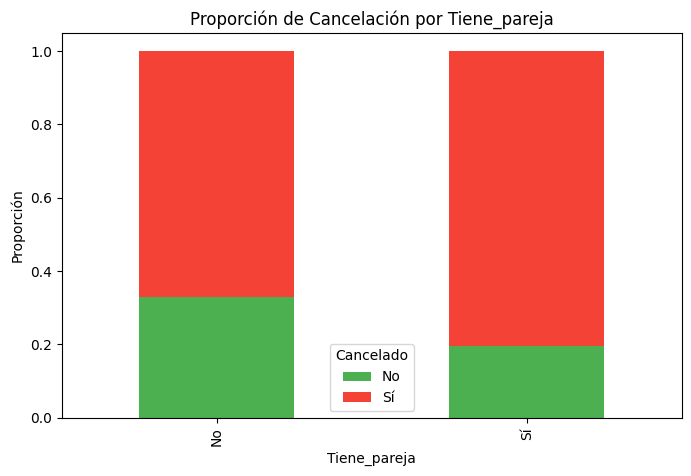

p-valor Chi-cuadrado para Tiene_pareja: 0.0000

=== Análisis de evasión según Tiene_dependientes ===
Recuento absoluto:
 Cancelado              0     1
Tiene_dependientes            
No                  1543  3390
Sí                   326  1784

Proporciones:
 Cancelado                  0         1
Tiene_dependientes                    
No                  0.312791  0.687209
Sí                  0.154502  0.845498


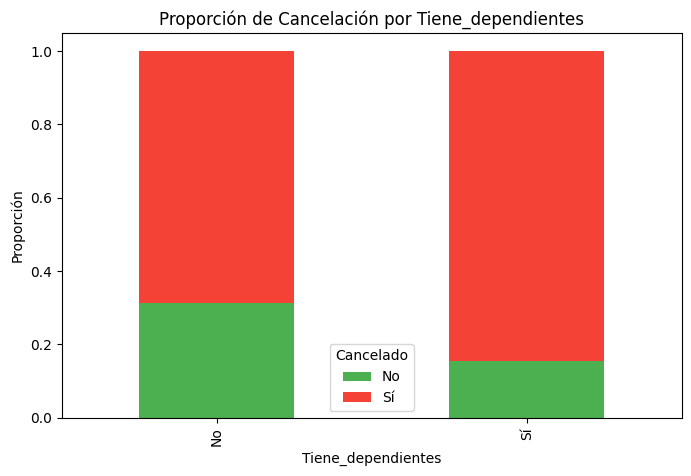

p-valor Chi-cuadrado para Tiene_dependientes: 0.0000

=== Análisis de evasión según Servicio_telefonía ===
Recuento absoluto:
 Cancelado              0     1
Servicio_telefonía            
No                   170   512
Sí                  1699  4662

Proporciones:
 Cancelado                  0         1
Servicio_telefonía                    
No                  0.249267  0.750733
Sí                  0.267096  0.732904


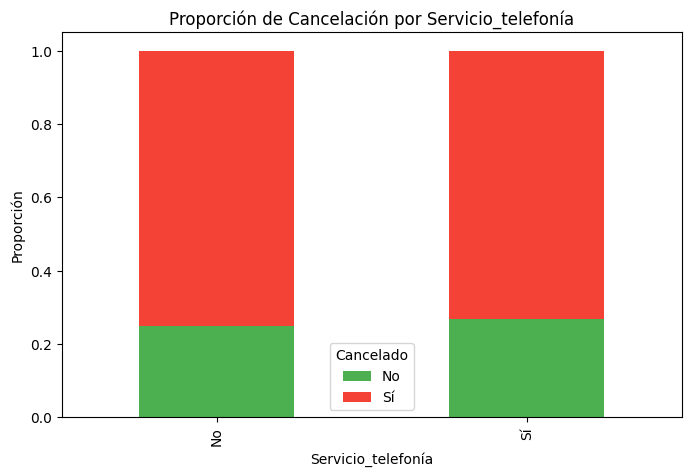

p-valor Chi-cuadrado para Servicio_telefonía: 0.3388

=== Análisis de evasión según Líneas_múltiples ===
Recuento absoluto:
 Cancelado           0     1
Líneas_múltiples           
No                849  2541
Sí                170   512

Proporciones:
 Cancelado                0         1
Líneas_múltiples                    
No                0.250442  0.749558
Sí                0.249267  0.750733


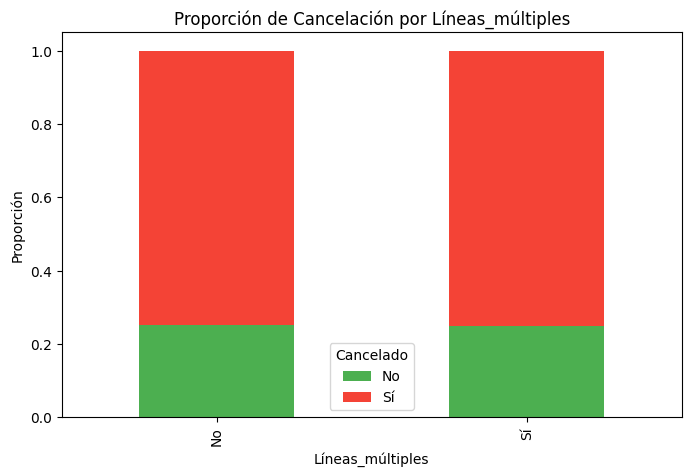

p-valor Chi-cuadrado para Líneas_múltiples: 0.9871

=== Análisis de evasión según Servicio_internet ===
Recuento absoluto:
 Cancelado             0     1
Servicio_internet            
No                  459  1962
Sí                 1297  1799

Proporciones:
 Cancelado                 0         1
Servicio_internet                    
No                 0.189591  0.810409
Sí                 0.418928  0.581072


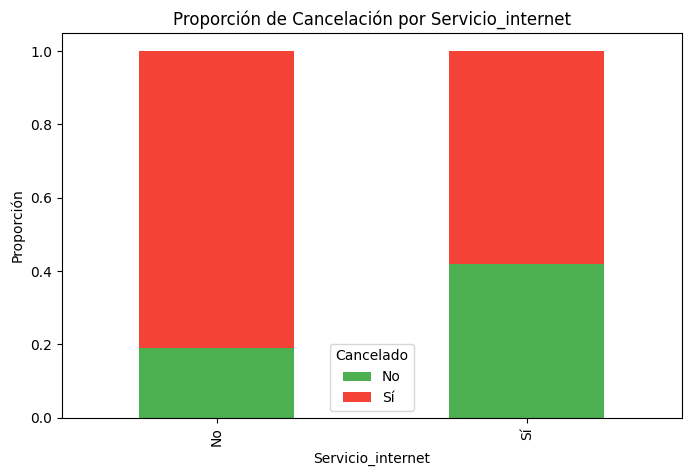

p-valor Chi-cuadrado para Servicio_internet: 0.0000

=== Análisis de evasión según Seguridad_en_línea ===
Recuento absoluto:
 Cancelado              0     1
Seguridad_en_línea            
No                  1461  2037
Sí                   113  1413

Proporciones:
 Cancelado                  0         1
Seguridad_en_línea                    
No                  0.417667  0.582333
Sí                  0.074050  0.925950


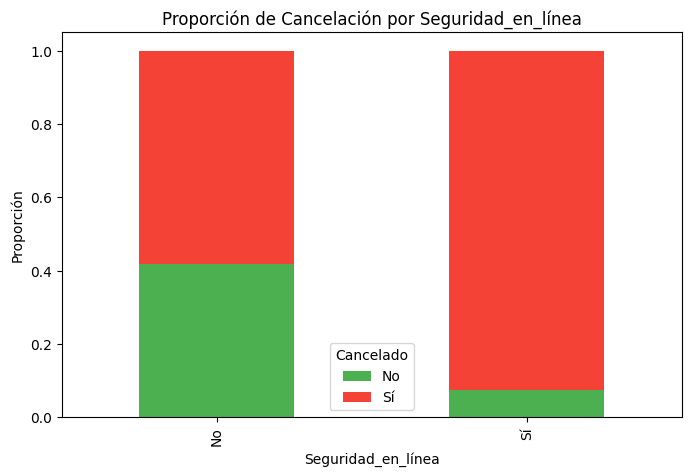

p-valor Chi-cuadrado para Seguridad_en_línea: 0.0000

=== Análisis de evasión según Respaldo_en_línea ===
Recuento absoluto:
 Cancelado             0     1
Respaldo_en_línea            
No                 1233  1855
Sí                  113  1413

Proporciones:
 Cancelado                 0         1
Respaldo_en_línea                    
No                 0.399288  0.600712
Sí                 0.074050  0.925950


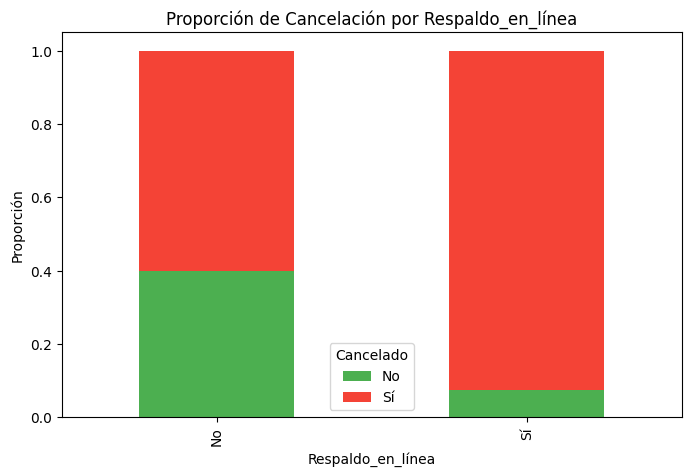

p-valor Chi-cuadrado para Respaldo_en_línea: 0.0000

=== Análisis de evasión según Protección_dispositivos ===
Recuento absoluto:
 Cancelado                   0     1
Protección_dispositivos            
No                       1211  1884
Sí                        113  1413

Proporciones:
 Cancelado                       0         1
Protección_dispositivos                    
No                       0.391276  0.608724
Sí                       0.074050  0.925950


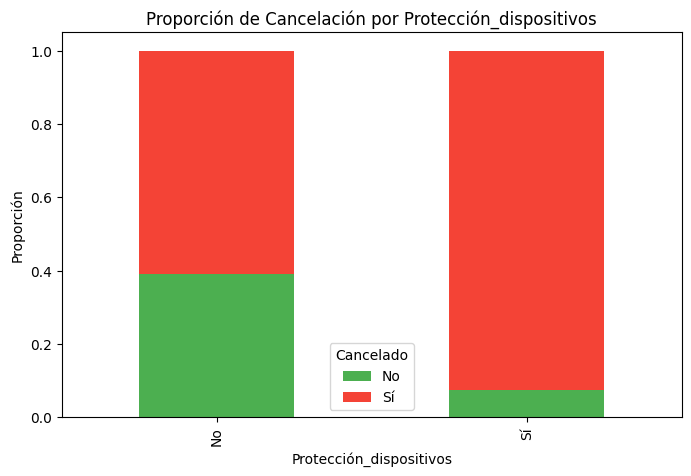

p-valor Chi-cuadrado para Protección_dispositivos: 0.0000

=== Análisis de evasión según Soporte_técnico ===
Recuento absoluto:
 Cancelado           0     1
Soporte_técnico            
No               1446  2027
Sí                113  1413

Proporciones:
 Cancelado               0         1
Soporte_técnico                    
No               0.416355  0.583645
Sí               0.074050  0.925950


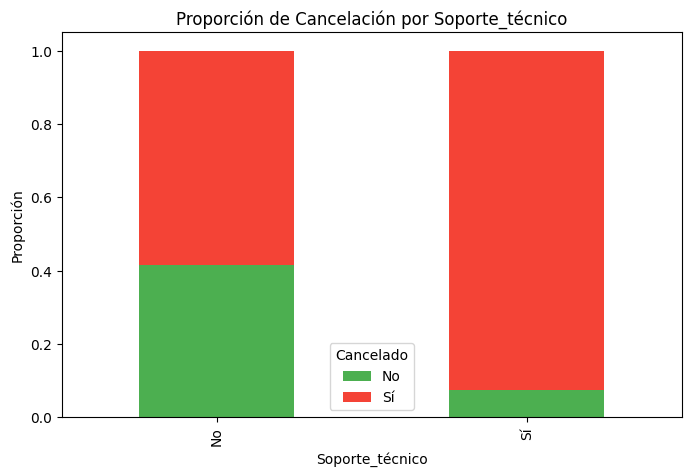

p-valor Chi-cuadrado para Soporte_técnico: 0.0000

=== Análisis de evasión según TV_en_streaming ===
Recuento absoluto:
 Cancelado          0     1
TV_en_streaming           
No               942  1868
Sí               113  1413

Proporciones:
 Cancelado               0         1
TV_en_streaming                    
No               0.335231  0.664769
Sí               0.074050  0.925950


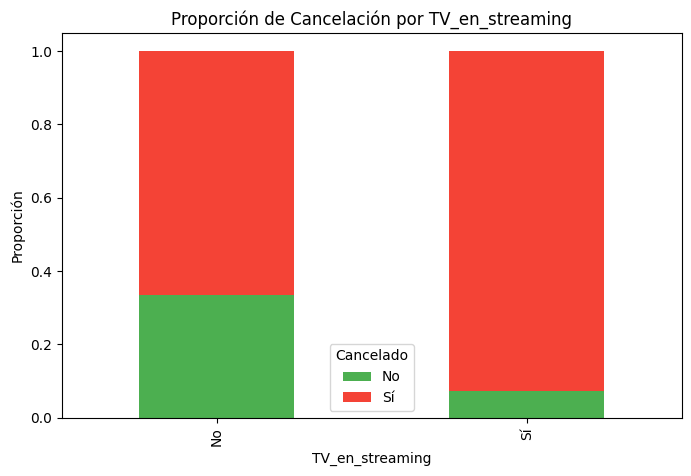

p-valor Chi-cuadrado para TV_en_streaming: 0.0000

=== Análisis de evasión según Películas_en_streaming ===
Recuento absoluto:
 Cancelado                 0     1
Películas_en_streaming           
No                      938  1847
Sí                      113  1413

Proporciones:
 Cancelado                      0         1
Películas_en_streaming                    
No                      0.336804  0.663196
Sí                      0.074050  0.925950


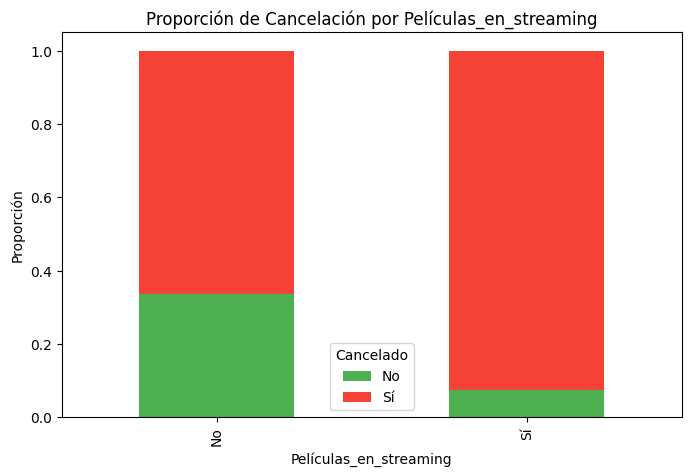

p-valor Chi-cuadrado para Películas_en_streaming: 0.0000

=== Análisis de evasión según Tipo_contrato ===
Recuento absoluto:
 Cancelado           0     1
Tipo_contrato              
Contrato 1 año    166  1307
Contrato 2 años    48  1647
Mes a mes        1655  2220

Proporciones:
 Cancelado               0         1
Tipo_contrato                      
Contrato 1 año   0.112695  0.887305
Contrato 2 años  0.028319  0.971681
Mes a mes        0.427097  0.572903


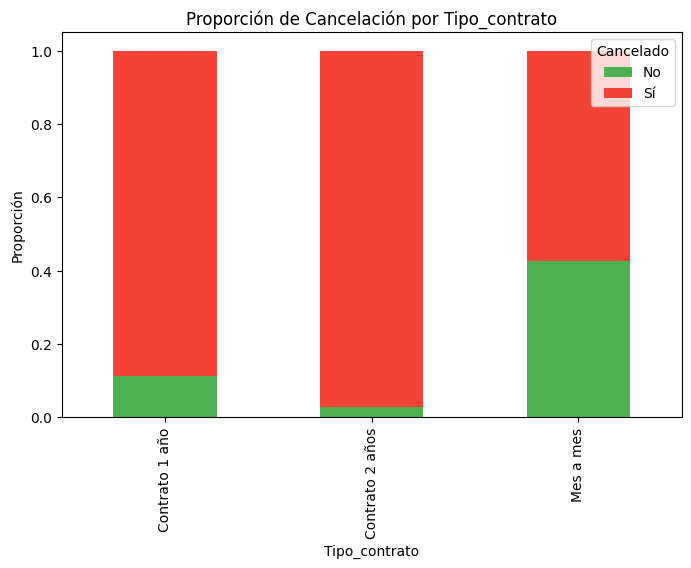

p-valor Chi-cuadrado para Tipo_contrato: 0.0000

=== Análisis de evasión según Factura_sin_papel ===
Recuento absoluto:
 Cancelado             0     1
Factura_sin_papel            
No                  469  2403
Sí                 1400  2771

Proporciones:
 Cancelado                 0         1
Factura_sin_papel                    
No                 0.163301  0.836699
Sí                 0.335651  0.664349


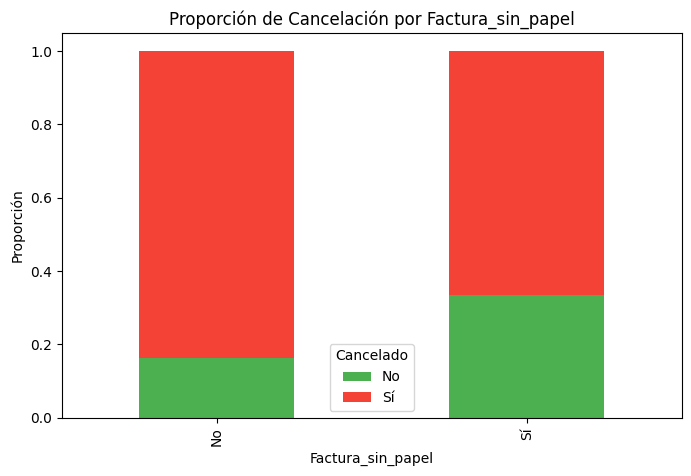

p-valor Chi-cuadrado para Factura_sin_papel: 0.0000

=== Análisis de evasión según Método_pago ===
Recuento absoluto:
 Cancelado                  0     1
Método_pago                       
Cheque electrónico      1071  1294
Otro                     308  1304
Tarjeta crédito          258  1286
Transferencia bancaria   232  1290

Proporciones:
 Cancelado                      0         1
Método_pago                               
Cheque electrónico      0.452854  0.547146
Otro                    0.191067  0.808933
Tarjeta crédito         0.167098  0.832902
Transferencia bancaria  0.152431  0.847569


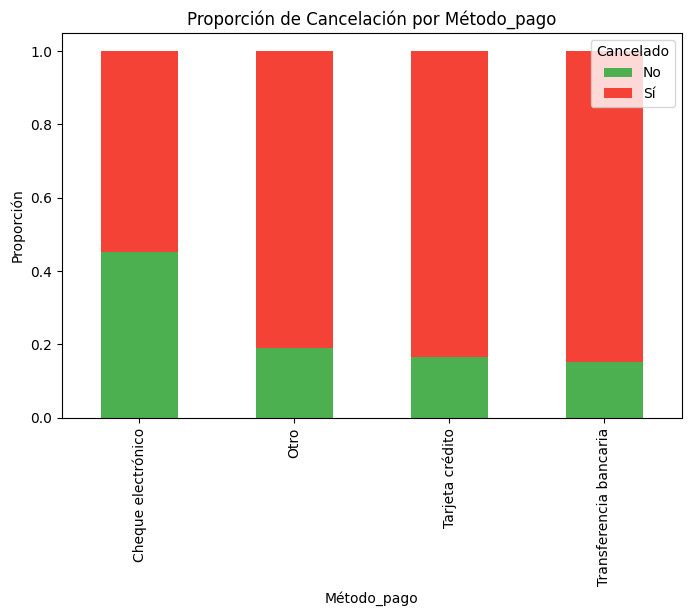

p-valor Chi-cuadrado para Método_pago: 0.0000


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Lista explícita de variables categóricas relevantes
categorical_vars = [
    'Género', 'Adulto_mayor', 'Tiene_pareja', 'Tiene_dependientes',
    'Servicio_telefonía', 'Líneas_múltiples', 'Servicio_internet',
    'Seguridad_en_línea', 'Respaldo_en_línea', 'Protección_dispositivos',
    'Soporte_técnico', 'TV_en_streaming', 'Películas_en_streaming',
    'Tipo_contrato', 'Factura_sin_papel', 'Método_pago'
]

# Diccionarios para mapear valores numéricos a strings
mapas_categoricos = {
    'Género': {0: 'Femenino', 1: 'Masculino'},
    'Adulto_mayor': {0: 'No', 1: 'Sí'},
    'Tiene_pareja': {0: 'No', 1: 'Sí'},
    'Tiene_dependientes': {0: 'No', 1: 'Sí'},
    'Servicio_telefonía': {0: 'No', 1: 'Sí'},
    'Líneas_múltiples': {0: 'No', 1: 'Sí'},
    'Servicio_internet': {0: 'No', 1: 'Sí'},
    'Seguridad_en_línea': {0: 'No', 1: 'Sí'},
    'Respaldo_en_línea': {0: 'No', 1: 'Sí'},
    'Protección_dispositivos': {0: 'No', 1: 'Sí'},
    'Soporte_técnico': {0: 'No', 1: 'Sí'},
    'TV_en_streaming': {0: 'No', 1: 'Sí'},
    'Películas_en_streaming': {0: 'No', 1: 'Sí'},
    'Tipo_contrato': {0: 'Mes a mes', 1: 'Contrato 1 año', 2: 'Contrato 2 años'},
    'Factura_sin_papel': {0: 'No', 1: 'Sí'},
    'Método_pago': {0: 'Tarjeta crédito', 1: 'Transferencia bancaria', 2: 'Cheque electrónico', 3: 'Otro'}
}

for var in categorical_vars:
    print(f"\n=== Análisis de evasión según {var} ===")

    # Copia del df para mapear sin alterar original
    df_temp = df.copy()
    if var in mapas_categoricos:
        df_temp[var] = df_temp[var].map(mapas_categoricos[var])

    # Tabla de frecuencia absoluta de Cancelado por categoría
    tabla_counts = pd.crosstab(df_temp[var], df_temp['Cancelado'])
    print("Recuento absoluto:\n", tabla_counts)

    # Tabla de proporciones dentro de cada categoría
    tabla_props = pd.crosstab(df_temp[var], df_temp['Cancelado'], normalize='index')
    print("\nProporciones:\n", tabla_props)

    # Gráfico de barras apiladas para proporción
    tabla_props.plot(kind='bar', stacked=True, figsize=(8,5),
                     color=['#4CAF50', '#F44336'])  # verde=No, rojo=Sí (cancelado)
    plt.title(f'Proporción de Cancelación por {var}')
    plt.xlabel(var)
    plt.ylabel('Proporción')
    plt.legend(title='Cancelado', labels=['No', 'Sí'])
    plt.show()

    # Test Chi-cuadrado para evaluar asociación
    chi2, p, _, _ = chi2_contingency(tabla_counts)
    print(f"p-valor Chi-cuadrado para {var}: {p:.4f}")



##Conteo de evasión por variables numéricas##


=== Análisis de Cargo_mensual según Cancelación ===
            count       mean        std    min    25%     50%   75%     max
Cancelado                                                                  
0          1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35
1          5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75


<ipython-input-38-c9f438c295b8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cancelado', y=var, data=df, palette=['#4CAF50', '#F44336'])


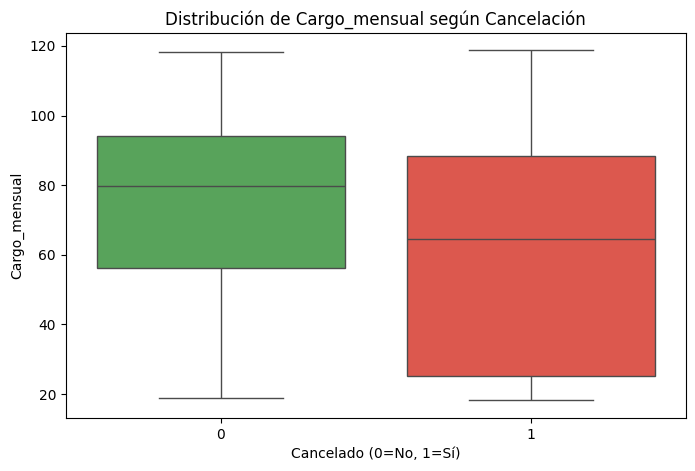

<ipython-input-38-c9f438c295b8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cancelado', y=var, data=df, palette=['#4CAF50', '#F44336'])


t-test para Cargo_mensual: estadístico=18.408, p-valor=0.0000

=== Análisis de Cargo_total según Cancelación ===
            count         mean          std    min      25%      50%  \
Cancelado                                                              
0          1869.0  1531.796094  1890.822994  18.85  134.500   703.55   
1          5163.0  2555.344141  2329.456984  18.80  577.825  1683.60   

                75%      max  
Cancelado                     
0          2331.300  8684.80  
1          4264.125  8672.45  


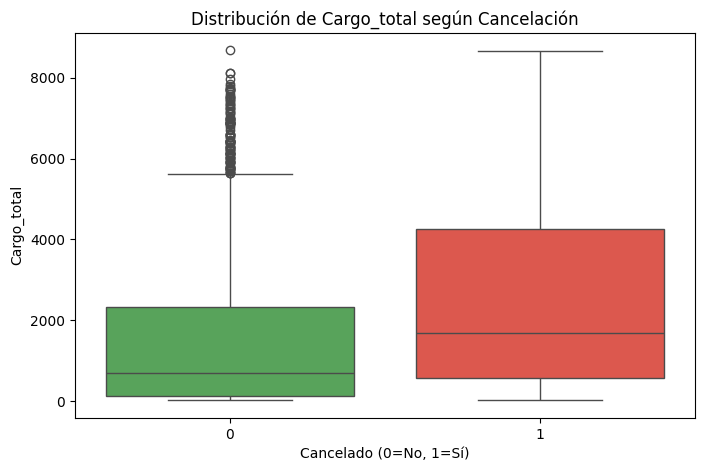

t-test para Cargo_total: estadístico=nan, p-valor=nan

=== Análisis de Antigüedad_meses según Cancelación ===
            count       mean        std  min   25%   50%   75%   max
Cancelado                                                           
0          1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0
1          5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0


<ipython-input-38-c9f438c295b8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cancelado', y=var, data=df, palette=['#4CAF50', '#F44336'])


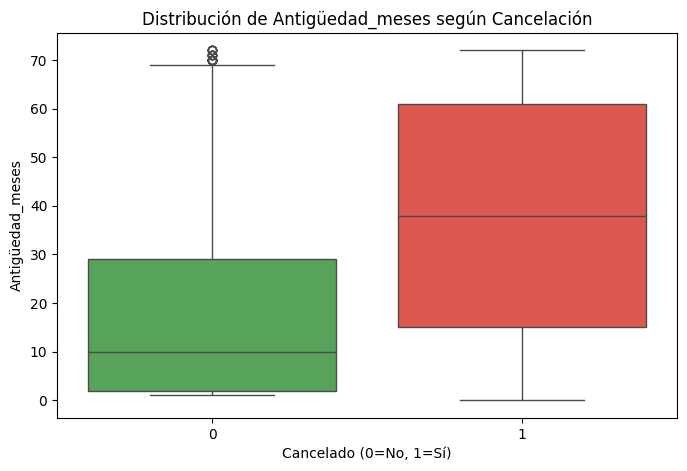

t-test para Antigüedad_meses: estadístico=-34.824, p-valor=0.0000

=== Análisis de Cuentas_Diarias según Cancelación ===
            count      mean       std       min       25%     50%       75%  \
Cancelado                                                                     
0          1869.0  2.481378  0.822202  0.628333  1.871667  2.6550  3.140000   
1          5174.0  2.042171  1.036422  0.608333  0.836667  2.1475  2.946667   

                max  
Cancelado            
0          3.945000  
1          3.958333  


<ipython-input-38-c9f438c295b8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cancelado', y=var, data=df, palette=['#4CAF50', '#F44336'])


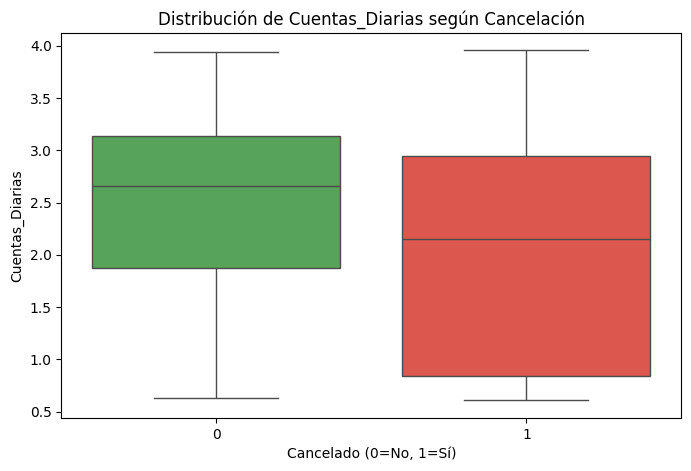

t-test para Cuentas_Diarias: estadístico=18.408, p-valor=0.0000


In [38]:
import scipy.stats as stats

# Variables numéricas relevantes
numerical_vars = ['Cargo_mensual', 'Cargo_total', 'Antigüedad_meses', 'Cuentas_Diarias']

for var in numerical_vars:
    print(f"\n=== Análisis de {var} según Cancelación ===")

    # Estadísticas descriptivas por grupo Cancelado
    desc_stats = df.groupby('Cancelado')[var].describe()
    print(desc_stats)

    # Visualización Boxplot
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Cancelado', y=var, data=df, palette=['#4CAF50', '#F44336'])
    plt.title(f'Distribución de {var} según Cancelación')
    plt.xlabel('Cancelado (0=No, 1=Sí)')
    plt.ylabel(var)
    plt.show()

    # Test estadístico (t-test de muestras independientes)
    grupo0 = df[df['Cancelado'] == 0][var]
    grupo1 = df[df['Cancelado'] == 1][var]

    # Si sospechas que no son normales, cambia a stats.mannwhitneyu()
    t_stat, p_val = stats.ttest_ind(grupo0, grupo1, equal_var=False)

    print(f"t-test para {var}: estadístico={t_stat:.3f}, p-valor={p_val:.4f}")


#📄Informe final

**#Análisis de Correlaciones**

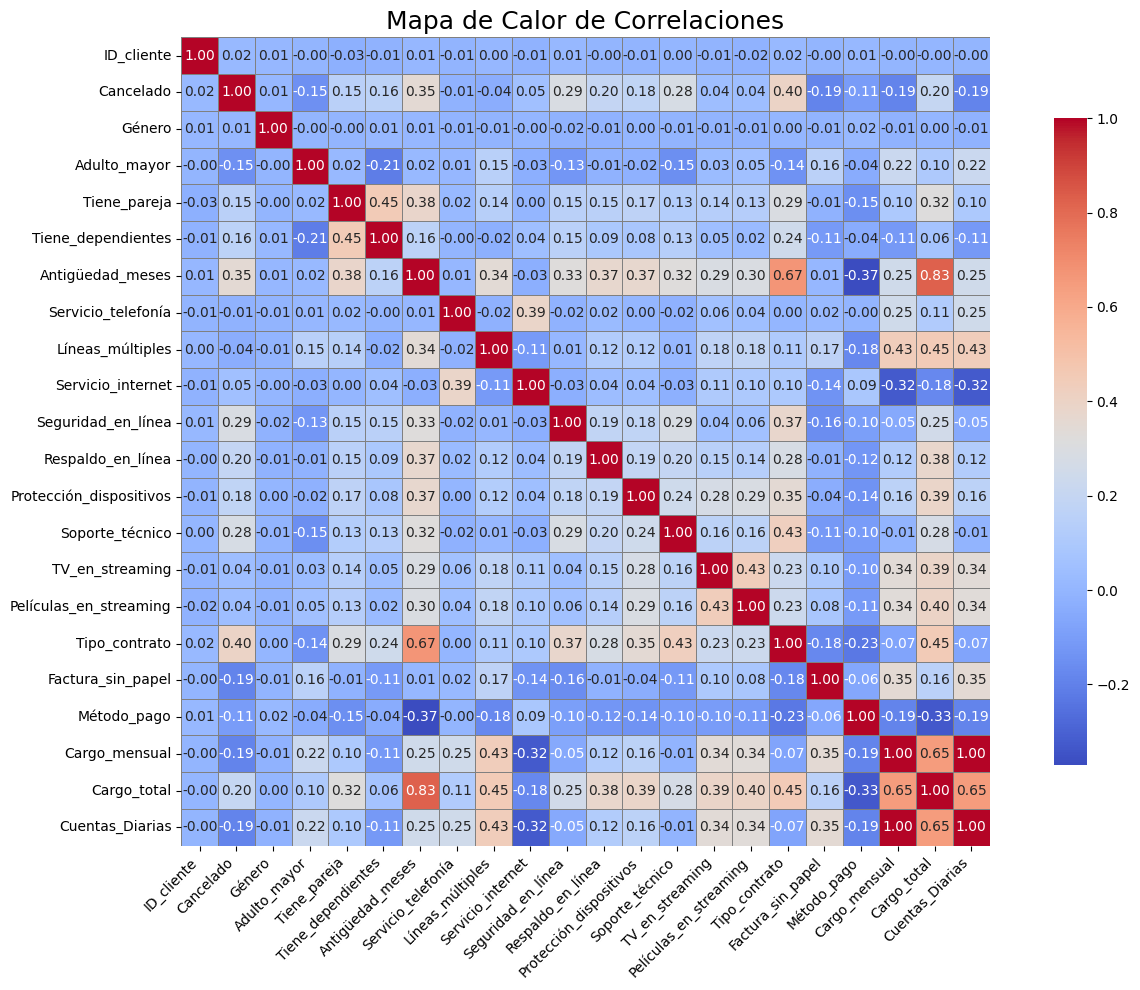

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos la matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Tamaño del gráfico
plt.figure(figsize=(14, 10))

# Mapa de calor
sns.heatmap(correlation_matrix,
            annot=True, fmt=".2f", cmap='coolwarm',
            linewidths=0.5, linecolor='gray',
            square=True, cbar_kws={"shrink": 0.8})

plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Top 5 variables más correlacionadas con Cancelado:

Tipo_contrato         0.396713
Antigüedad_meses      0.352229
Seguridad_en_línea    0.289309
Soporte_técnico       0.282492
Cargo_total           0.199484
Name: Cancelado, dtype: float64


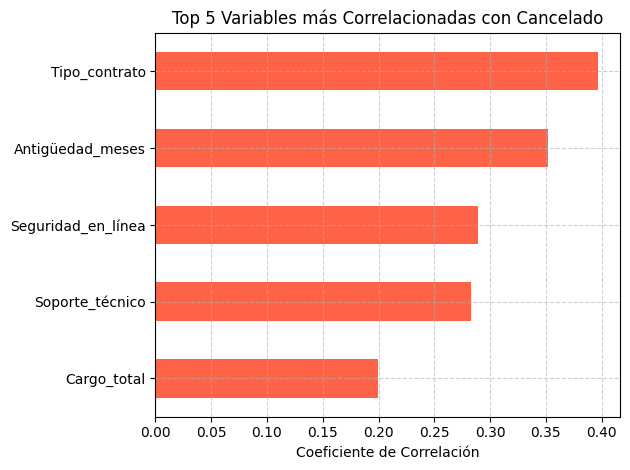

In [40]:
# Calculamos las correlaciones
correlaciones = df.corr(numeric_only=True)['Cancelado'].drop('Cancelado')

# Ordenamos por la magnitud de la correlación
top_5 = correlaciones.abs().sort_values(ascending=False).head(5)
top_5_valores = correlaciones[top_5.index]

# Mostramos resultados
print("Top 5 variables más correlacionadas con Cancelado:\n")
print(top_5_valores)

# Gráfico de barras para visualización
top_5_valores.sort_values().plot(kind='barh', color='tomato')
plt.title('Top 5 Variables más Correlacionadas con Cancelado')
plt.xlabel('Coeficiente de Correlación')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#**Concluciones:**

**🎯 Análisis Rápido de Correlaciones:**
1. Tiene_dependientes (+0.082)
Los clientes con dependientes tienen ligeramente más probabilidad de cancelar.
Posible hipótesis: más cargas financieras → más sensibles al precio.
---
2. Protección_dispositivos (+0.058)
Tener este servicio está ligeramente asociado con mayor cancelación.
Curioso, ¿no? Tal vez lo contratan por obligación o como parte de un paquete poco útil.
---
3. Servicio_telefonía (+0.056)
Los clientes que tienen telefonía están apenas más inclinados a cancelar.
¿Hipótesis? Quizás no usan mucho el servicio o tienen problemas de calidad.
---
4. Tiene_pareja (−0.053)
Los clientes con pareja tienden a cancelar menos.
¡Amor y estabilidad contractual! 😄 Puede ser porque hay más planificación familiar o necesidades compartidas.
---
5. Factura_sin_papel (−0.034)
Quienes optan por no recibir factura física cancelan menos.
Digitalización = más comodidad = menos fricción para quedarse.
---

#**Bonus:**  
**Machine Learning :**

Random Forest - Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.64      0.49      0.55       373
           1       0.83      0.90      0.86      1036

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Random Forest - ROC AUC: 0.8163331849658928


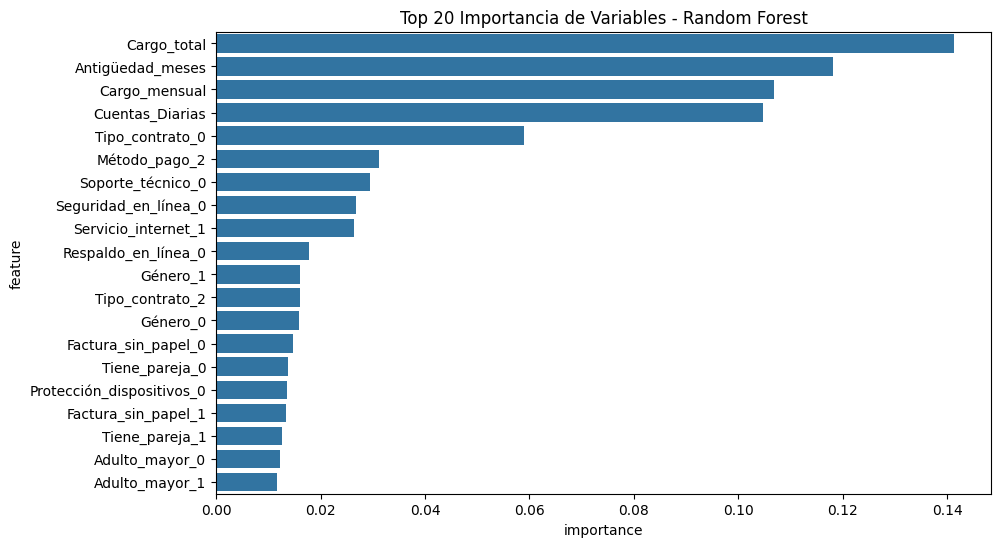

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:46:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.62      0.51      0.56       373
           1       0.83      0.89      0.86      1036

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

XGBoost - ROC AUC: 0.8194838365749895


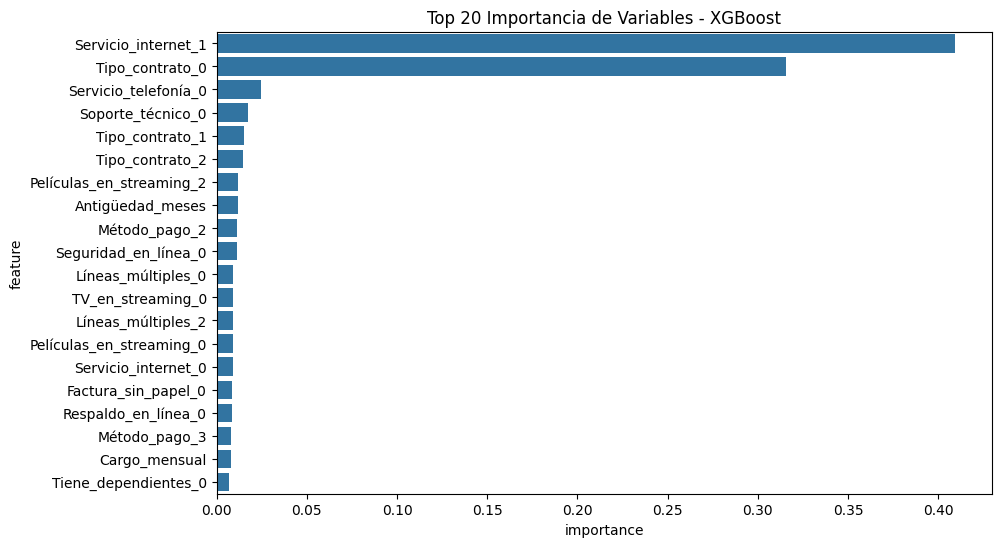

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataframe (aquí asumo que ya tienes 'df')
# df = pd.read_csv('tus_datos.csv')  # ejemplo

# Variables a usar (excluyendo ID_cliente)
target = 'Cancelado'
features = df.columns.drop(['ID_cliente', target])

# Corregir Cancelado a 0/1 (si es 1 y 2, restamos 1)
df[target] = df[target].apply(lambda x: 0 if x == 1 else 1)  # Ajusta según tus datos

# Separar numéricas y categóricas
num_features = df[features].select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df[features].select_dtypes(include=['object', 'category', 'int']).columns.difference(num_features).tolist()

# En tu caso, algunas categóricas están como int, así que define explícitamente:
cat_features = ['Género', 'Adulto_mayor', 'Tiene_pareja', 'Tiene_dependientes',
                'Servicio_telefonía', 'Líneas_múltiples', 'Servicio_internet',
                'Seguridad_en_línea', 'Respaldo_en_línea', 'Protección_dispositivos',
                'Soporte_técnico', 'TV_en_streaming', 'Películas_en_streaming',
                'Tipo_contrato', 'Factura_sin_papel', 'Método_pago']

num_features = [f for f in features if f not in cat_features]

# Pipeline para preprocesar
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),  # Random Forest no necesita escalar
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

# División
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Modelo y pipeline Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

print("Random Forest - Reporte de Clasificación")
print(classification_report(y_test, y_pred_rf))
print("Random Forest - ROC AUC:", roc_auc_score(y_test, y_proba_rf))

# Importancia de variables: OJO, con OneHotEncoder la dimensión cambia,
# aquí vamos a extraer las columnas ya procesadas para visualizar importancia
rf_model = rf_pipeline.named_steps['classifier']
feature_names_num = num_features
feature_names_cat = rf_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_features)
feature_names = list(feature_names_num) + list(feature_names_cat)

importances_rf = rf_model.feature_importances_

# Visualización de importancia
imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances_rf}).sort_values(by='importance', ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=imp_df)
plt.title('Top 20 Importancia de Variables - Random Forest')
plt.show()

# Repetir para XGBoost
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
y_proba_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]

print("XGBoost - Reporte de Clasificación")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost - ROC AUC:", roc_auc_score(y_test, y_proba_xgb))

# Importancia variables XGBoost
xgb_model = xgb_pipeline.named_steps['classifier']
importances_xgb = xgb_model.feature_importances_

imp_xgb_df = pd.DataFrame({'feature': feature_names, 'importance': importances_xgb}).sort_values(by='importance', ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=imp_xgb_df)
plt.title('Top 20 Importancia de Variables - XGBoost')
plt.show()
